In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv("back_hospital.csv",index_col = 0)
test =  pd.read_csv("submission.csv")
sub = pd.read_csv("submission.csv")
train.rename(columns = {'back_hospital.yyyymmdd' : 'yyyymmdd',
                        'back_hospital.area' : 'area',
                        'back_hospital.sex' : 'sex',
                        'back_hospital.frequency' : 'frequency'}, inplace = True)
# 날짜형식 변환
train['yyyymmdd'] = train['yyyymmdd'].astype(str)
train['yyyymmdd'] = pd.to_datetime(train['yyyymmdd'])

test['yyyymmdd'] = pd.to_datetime(test['yyyymmdd'])

# 날짜 나누기
train['year'] = train['yyyymmdd'].dt.year
train['month'] = train['yyyymmdd'].dt.month
train['day'] = train['yyyymmdd'].dt.day
train['day_name'] = train['yyyymmdd'].dt.day_name()

test['year'] = test['yyyymmdd'].dt.year
test['month'] = test['yyyymmdd'].dt.month
test['day'] = test['yyyymmdd'].dt.day
test['day_name'] = test['yyyymmdd'].dt.day_name()

# 기존칼럼 drop
train.drop('yyyymmdd', axis = 1, inplace = True)
test.drop('yyyymmdd', axis = 1, inplace = True)

In [2]:
train1 = pd.read_csv('강수_강원영동.csv',index_col = 0)
train2 = pd.read_csv('강수_강원영서.csv',index_col = 0)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='month', ylabel='평균'>

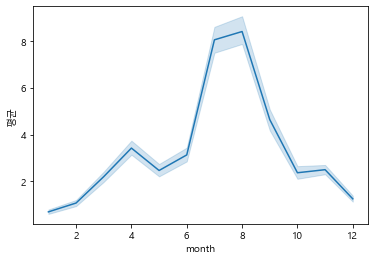

In [5]:
sns.lineplot(x=train1['month'], y = train1['평균'])

알다시피 겨울에 강수량이 떨어지고 여름에 강수량이 증가한다.

<AxesSubplot:xlabel='month', ylabel='frequency'>

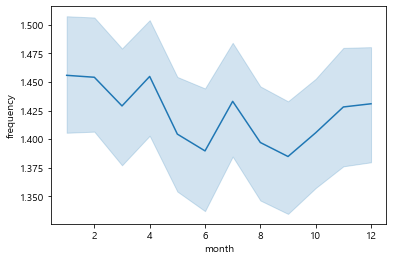

In [6]:
# 월별 혈관질환 빈도수
sns.lineplot(x = train1['month'], y=train1['frequency'])

음..

<AxesSubplot:xlabel='frequency', ylabel='평균'>

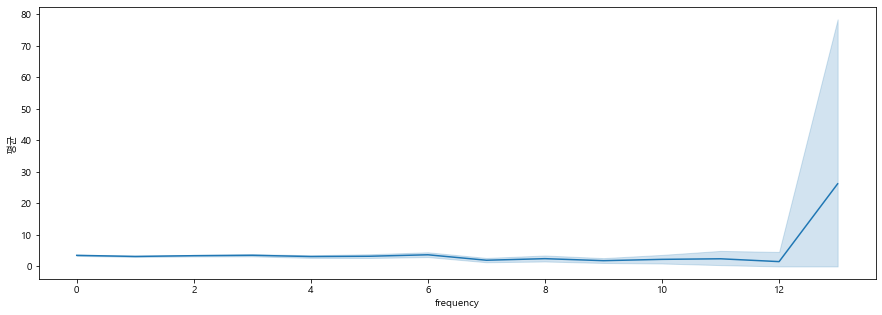

In [7]:
plt.rcParams['figure.figsize'] = (15,5)
sns.lineplot(x = train1['frequency'], y=train1['평균'])

빈도수가 높을수록 데이터수가 적어져 편차가 커진것 같다   
10회 이상 데이터는 제외시킨 뒤 다시 분석해보자

In [8]:
train1[train1['frequency']>8]

,지역번호,sex,frequency,year,month,day,day_name,평균
138,경기,1,12,2012,1,5,Thursday,0.0
152,서울,1,9,2012,1,5,Thursday,0.0
342,경기,1,11,2012,1,11,Wednesday,0.0
377,경기,2,12,2012,1,12,Thursday,0.0
1057,경기,2,11,2012,2,1,Wednesday,0.0
...,...,...,...,...,...,...,...,...
49064,경기,1,9,2015,12,14,Monday,4.2
49065,경기,2,10,2015,12,14,Monday,4.2
49167,경기,2,13,2015,12,17,Thursday,0.0
49351,서울,2,9,2015,12,22,Tuesday,0.0


In [12]:
index = train1[train1['frequency']>6].index

In [13]:
train_11 = train1.drop(index,axis =0)

<AxesSubplot:xlabel='frequency', ylabel='평균'>

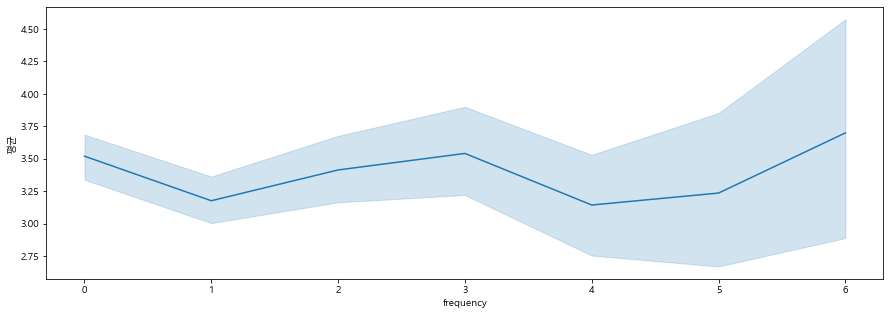

In [14]:
sns.lineplot(x = train_11['frequency'], y=train_11['평균'])

빈도수와 강수량의 선형관계가 나타나지 않아보인다.

Text(0.5, 1.0, '습도 (강원영동지방 기준)')

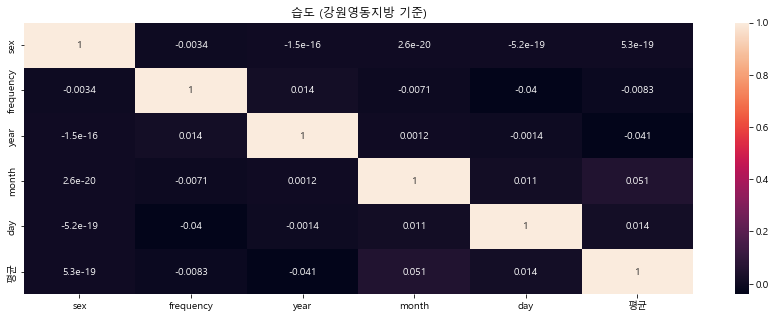

In [15]:
corr = train1.corr()
sns.heatmap(corr, annot = True)
plt.title('습도 (강원영동지방 기준)')

Text(0.5, 1.0, '습도 (강원영서지방 기준)')

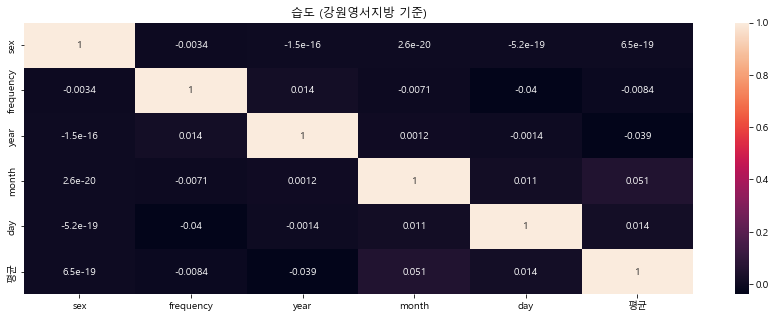

In [16]:
corr = train2.corr()
sns.heatmap(corr, annot = True)
plt.title('습도 (강원영서지방 기준)')

<AxesSubplot:xlabel='지역번호', ylabel='평균'>

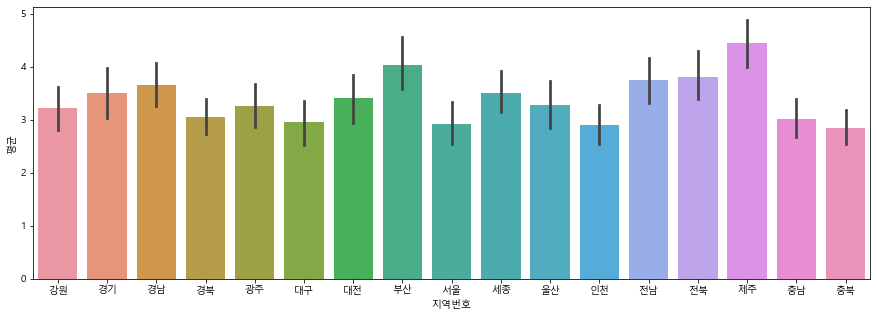

In [17]:
sns.barplot(x = train_11['지역번호'], y = train_11['평균'],)

음.. 강수량과 뚜렷한 관계가 있어보이지는 않는다.

<AxesSubplot:xlabel='day', ylabel='frequency'>

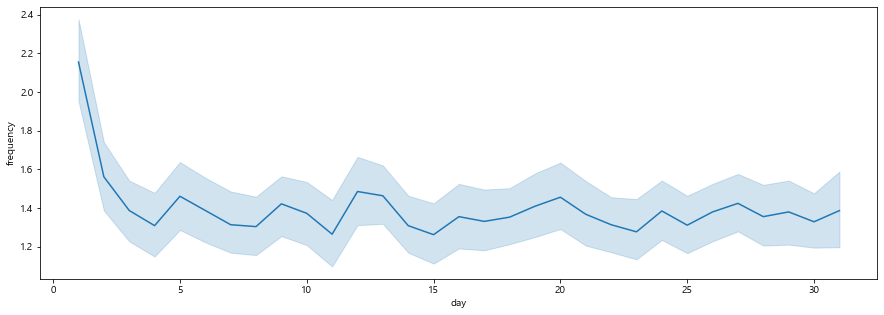

In [62]:
sns.lineplot(x=train_1['day'], y = train_1['frequency'])